In [13]:
# ========================
# 1. Import libraries
# ========================
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# ========================
# 2. Load dataset
# ========================
df = pd.read_csv("loan_synthetic_dataset.csv")

# Drop ID & probability column
df_model = df.drop(['loan_id', 'default_prob'], axis=1)

# One-hot encode categorical variables
df_model = pd.get_dummies(df_model, columns=['gender','education','purpose'], drop_first=True)

# Split features & target
X = df_model.drop('default', axis=1)
y = df_model['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# ========================
# 3. Load trained model
# ========================
model = joblib.load("logistic_regression_model.pkl")


✅ Model Performance:
Accuracy: 0.9821
ROC-AUC: 0.9967

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2160
           1       0.93      0.88      0.91       240

    accuracy                           0.98      2400
   macro avg       0.96      0.94      0.95      2400
weighted avg       0.98      0.98      0.98      2400



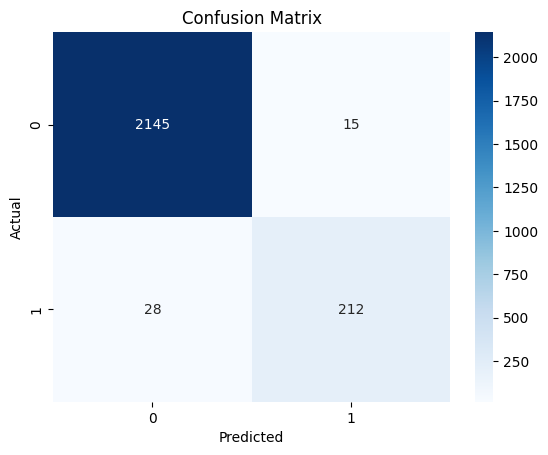

In [15]:
# ========================
# 4. Predictions
# ========================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]   # probability of default

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print("✅ Model Performance:")
print("Accuracy:", round(acc,4))
print("ROC-AUC:", round(roc,4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
# ========================
# 5. Test with New Data (Example Prediction)
# ========================

# Example borrower details
new_data = pd.DataFrame([{
    'age': 35,
    'gender': 'Male',
    'education': 'Bachelors',
    'employment_years': 5,
    'loan_amount': 20000,
    'term_months': 60,
    'interest_rate': 12,
    'installment': 450,
    'purpose': 'Car',
    'annual_income': 55000,
    'dti': 0.25,
    'credit_history_length': 6,
    'open_accounts': 5
}])

# One-hot encoding (align with training columns)
new_data = pd.get_dummies(new_data, columns=['gender','education','purpose'], drop_first=True)
new_data = new_data.reindex(columns=X.columns, fill_value=0)

# Scale
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = model.predict(new_data_scaled)[0]
probability = model.predict_proba(new_data_scaled)[0][1]

print("Prediction (0=No Default, 1=Default):", prediction)
print("Default Probability:", round(probability,3))


Prediction (0=No Default, 1=Default): 0
Default Probability: 0.0


In [17]:
# Save scaler & feature columns during training
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns, "model_columns.pkl")

['model_columns.pkl']